In [1]:
# !pip install spectrum_utils[iplot]

In [8]:
import spectrum_utils.spectrum as sus
import spectrum_utils.plot as sup
import pyteomics.mgf as mgf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [16]:
import pyteomics
pyteomics.mass.calculate_mass('SVEMHHEALSEVLPGDNVGFNVK', charge=3) + 170/3

893.4111007667899

In [3]:
def spectrum_vis(scan, mgf_file, peptide_sequence):
    spectra = mgf.read(os.path.join(mgf_folder,mgf_file))
    target_title = f"scan={scan}"
    for spectrum in spectra:
        if target_title in spectrum['params']['title']:
            print(spectrum['params']['title'])
            print(spectrum['params'])
            mz_values = np.array(spectrum['m/z array'])
            intensities = np.array(spectrum['intensity array'])
            precursor_mz = float(spectrum['params'].get('pepmass', [0])[0])
            
            # Ensure charge is an integer
            charge = spectrum['params'].get('charge', [2])  # Default to charge 2
            if isinstance(charge, list):  # Some MGF files store charge as a list
                charge = charge[0]
            precursor_charge = int(charge)  # Convert to int explicitly
            
            retention_time = float(spectrum['params'].get('rtinseconds', float('nan')))
    
            # Create an MsmsSpectrum object with the updated constructor
            spec = sus.MsmsSpectrum(
                identifier=target_title,
                precursor_mz=precursor_mz,
                precursor_charge=precursor_charge,  # Ensure it's an int
                mz=mz_values,
                intensity=intensities,
                retention_time=retention_time
            )
    
            # Preprocess the spectrum
            spec = spec.set_mz_range(min_mz=100, max_mz=2000)  # Limit m/z range
            spec = spec.scale_intensity()  # Normalize intensity
            spec = spec.filter_intensity(0.01)  # Filter low-intensity peaks
    
            # Annotate the spectrum with the given peptide sequence
            spec.annotate_proforma(peptide_sequence, 20, "ppm")
            
            # Plot the annotated spectrum
            fig, ax = plt.subplots(figsize=(12, 6))
            sup.spectrum(spec, ax=ax)
            plt.title(f"Annotated Spectrum for {peptide_sequence}\nfile={mgf_file} {target_title}")
            plt.show()
    
            break  # Stop searching after finding the correct spectrum
    
            break  # Stop searching after finding the correct spectrum
    else:
        print("Spectrum not found.")

In [4]:
# Define the MGF file path
mgf_folder = 'D:/oui-discovery-mgfs'
data = pd.read_csv("C:/Users/Enrico/Desktop/SVEMHHEALS-1255-EVLPGDNVGFNVK.csv")

In [5]:
# spectrum_vis(15858, 'b1369p080_sample_08_b.mgf', "SVEMHHEALS[UNIMOD:1255]EVLPGDNVGFNVK")

b1369p080_sample_10_b: controllerType=0 controllerNumber=1 scan=17856
{'title': 'b1369p080_sample_10_b: controllerType=0 controllerNumber=1 scan=17856', 'scans': '17856', 'rtinseconds': 3050.21574, 'pepmass': (893.4150390625, None), 'charge': [3], 'scanevent': 'FTMS + c NSI d Full ms2 893.42@hcd28.00 [120.00-2755.00]'}


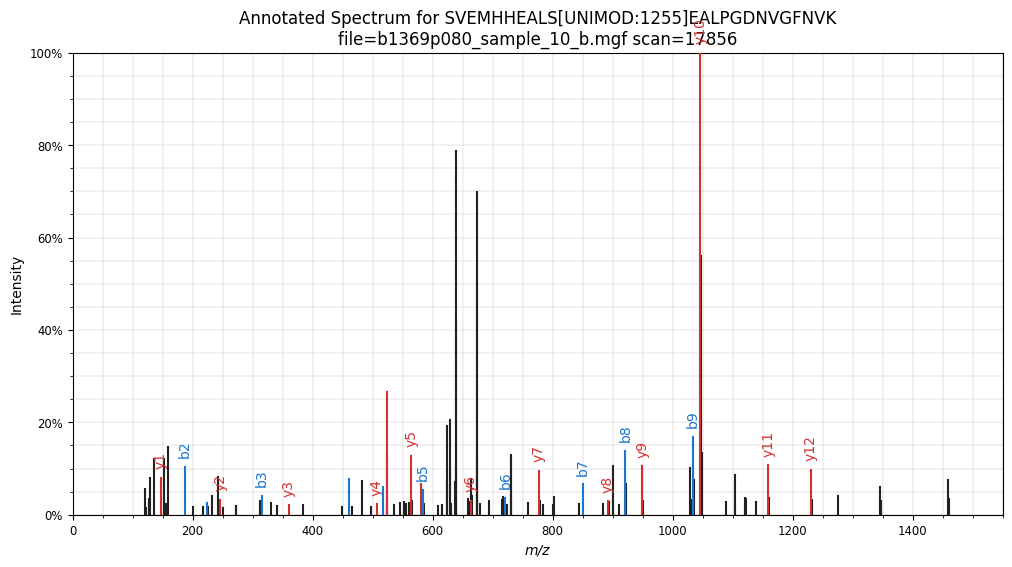

In [6]:
for _,(scan_, mgf_file_, peptide_sequence_) in data.head().iterrows():
    spectrum_vis(scan_, mgf_file_, "SVEMHHEALSEALPGDNVGFNVK" )
    break